In [1]:
import os
import pickle

import pandas as pd

In [2]:
# configs
tables = {
    "condiciones": "Condiciones.csv",
    "preguntas": "Preguntas.csv",
    "siniestros": "Siniestros.csv",
}
tmp_tables = {
    "condiciones": "condiciones.feather",
    "preguntas": "preguntas.feather",
    "siniestros": "siniestros.feather",
}
# file folders
read_path = "input_dataset"
tmp_path = "tmp"
output_path = "output_dataset"
pred_path = "pred_output"
# model files
FILE_MAPPER = "../../src/features/1.1 - dict categorical mappers.pickle"

In [14]:
# 3 columns and models
FILE_COLUMNS = {}
FILE_MODEL = {}

In [55]:
path = "models/3.2.0"

MODEL = {
    6: '3.2.0 - 060 recall with zone groups',
    5: '3.2.0 - 050 recall with zone groups',
    0: '3.2.0 - not 050-060 recall with zone groups'
}

for k, v in MODEL.items():
    FILE_MODEL[k] = os.path.join(path, MODEL[k], 'model.pickle')
    FILE_COLUMNS[k] = os.path.join(path, MODEL[k], 'columns.pickle')

In [56]:
os.path.isfile(FILE_MODEL[6])

True

In [57]:
def _load_file_from_pickle(file):
    """Load and return a pickle file."""
    with open(file, "rb") as f:
        o_file = pickle.load(f)
    return o_file

In [58]:
FILE_COLUMNS

{6: 'models/3.2.0/3.2.0 - 060 recall with zone groups/columns.pickle',
 5: 'models/3.2.0/3.2.0 - 050 recall with zone groups/columns.pickle',
 0: 'models/3.2.0/3.2.0 - not 050-060 recall with zone groups/columns.pickle'}

In [61]:
full_cols = []
for k, v in FILE_COLUMNS.items():
    full_cols.extend(_load_file_from_pickle(v))
full_cols = set(full_cols)

In [64]:
full_cols

{'ANTIG_pol',
 'CANT_RENOVACION',
 'CAPITAL_ACCESORIOS',
 'CAPITAL_ASEGURADO_COTIZACION',
 'CAPITAL_VEHICULO',
 'CODIGO_BAJA',
 'CODIGO_CARATULA',
 'CODIGO_REAPERTURA',
 'CODIGO_VEHICULO',
 'COD_CAUSA_SINI',
 'COD_COBRO_ANTERIOR',
 'COD_POST_OCURRENCIA',
 'COD_POST_OCURRENCIA_DP_CLUSTER_2019',
 'COD_POST_OCURRENCIA_RC_CLUSTER_2019',
 'COD_POST_OCURRENCIA_RT_CLUSTER_2019',
 'COD_POST_POLIZA',
 'COD_POST_POLIZA_DP_CLUSTER_2019',
 'COD_POST_POLIZA_RC_CLUSTER_2019',
 'COD_POST_POLIZA_RT_CLUSTER_2019',
 'COD_PROD',
 'COD_RAMO_sini',
 'COD_RIES_sini',
 'COD_ZONA_RC',
 'COD_ZONA_ROBO',
 'CONDICION_ROBO_EXP50',
 'CONV_COMISIONARIO',
 'DESCRIPCION_TIPO',
 'ESTADO_CIVIL',
 'ESTAD_VEH_ASEG',
 'FALTANTE',
 'FECHA_SINI_Day',
 'FECHA_SINI_Dayofyear',
 'FECHA_SINI_Elapsed',
 'FECHA_SINI_Month',
 'FECHA_SINI_Week',
 'OCUPACION_ASEG',
 'SEGMENTO',
 'SEXO',
 'TELEFONO_TERC',
 'TIPO_LESION',
 'TIPO_SINIESTRO',
 'cant_sini_1y',
 'cond_C10',
 'cond_C11',
 'cond_C12',
 'cond_C13',
 'cond_C15',
 'dias_entre_

# Data Preparation

## Condiciones

In [21]:
# path to tmp saved file
file = os.path.join(read_path, tables["condiciones"])
if not(os.path.exists(file) and os.path.isfile(file)):
    raise Exception("File: {file} doesn't exists.")

In [22]:
df = pd.read_csv(file, sep=";")
df.head()

,NUM_SECU_EXPED,NRO_ORDEN_EXP,CONDICION,VALOR_CONDICION,FEC_ACT,USR_ACT
0,1944557289999,0,C1,0.0,9/4/2019,ACOSTAF
1,1944557289999,0,C15,0.0,9/4/2019,ACOSTAF
2,1944557289999,0,C16,0.0,9/4/2019,ACOSTAF
3,1944557289999,0,C6,0.0,9/4/2019,ACOSTAF
4,1944557289999,0,C7,0.0,9/4/2019,ACOSTAF


In [23]:
# df["NUM_SECU_EXPED"].astype(str)

In [70]:
id_col = "NUM_SECU_EXPED"
condition = "CONDICION"
value_col = "VALOR_CONDICION"
# getting last repeated record
pv_df = df.pivot_table(index=id_col, columns=condition, values=value_col, aggfunc="last")
#renaming columns
pv_df = pv_df.add_prefix("cond_")
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228654 entries, 12453539999 to 1993264429999
Data columns (total 28 columns):
cond_05     28110 non-null float64
cond_06     28110 non-null float64
cond_09     28255 non-null float64
cond_11     28255 non-null float64
cond_12     2685 non-null float64
cond_32     14060 non-null float64
cond_37     63 non-null float64
cond_C1     133214 non-null float64
cond_C10    15310 non-null float64
cond_C11    15310 non-null float64
cond_C12    15310 non-null float64
cond_C13    123611 non-null float64
cond_C14    6526 non-null float64
cond_C15    224813 non-null float64
cond_C16    224813 non-null float64
cond_C17    29327 non-null float64
cond_C18    15310 non-null float64
cond_C19    15310 non-null float64
cond_C2     2685 non-null float64
cond_C20    15310 non-null float64
cond_C21    29327 non-null float64
cond_C3     2685 non-null float64
cond_C4     2479 non-null float64
cond_C5     2685 non-null float64
cond_C6     130529 non-null float64
c

In [71]:
pv_df["total_condicion"] = pv_df.sum(axis=1)
pv_df["es_gte_5"] = pv_df["total_condicion"] >= 5
pv_df.head()

CONDICION,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,cond_C1,cond_C10,cond_C11,...,cond_C21,cond_C3,cond_C4,cond_C5,cond_C6,cond_C7,cond_C8,cond_C9,total_condicion,es_gte_5
NUM_SECU_EXPED,,,,,,,,,,,,,,,,,,,,,
12453539999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,3.0,7.0,True
50281959999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,1.0,0.0,1.0,False
103490799999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,False
132097249999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,3.0,NaN,0.0,0.0,3.0,False
136201999999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,False


### tmp saving

In [72]:
# save file
tmp_file = os.path.join(tmp_path, "condiciones.feather")
pv_df.reset_index().to_feather(tmp_file)

## Preguntas

In [107]:
# path to tmp saved file
file = os.path.join(read_path, tables["preguntas"])
if not(os.path.exists(file) and os.path.isfile(file)):
    raise Exception("File: {file} doesn't exists.")

In [121]:
df = pd.read_csv(file, sep=",", nrows=20)
df.head()

,COD_CIA,COD_SECC,COD_RAMO,NUM_SINI,NRO_EXPED,NUM_SECU_EXPED,NRO_ORDEN_EXP,TIPO_EXPED,COD_PREGUNTA,VALOR_PREGUNTA,FEC_ACT,USR_ACT
0,1,4,1,54901190289,1,1922366799999,1,50,32,2,12/4/2019,DIMARCO
1,1,4,1,54901190289,1,1922366799999,1,50,16,N,12/4/2019,DIMARCO
2,1,4,1,54901190289,1,1922366799999,1,50,27,14/02/2019 17:00,12/4/2019,DIMARCO
3,1,4,1,54901190289,1,1922366799999,1,50,28,14/02/2019 20:00,12/4/2019,DIMARCO
4,1,4,1,54901190289,1,1922366799999,1,50,12,D,12/4/2019,DIMARCO


In [132]:
df.to_csv("preguntas_20rows.csv", sep=";")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
COD_CIA           20 non-null int64
COD_SECC          20 non-null int64
COD_RAMO          20 non-null int64
NUM_SINI          20 non-null int64
NRO_EXPED         20 non-null int64
NUM_SECU_EXPED    20 non-null int64
NRO_ORDEN_EXP     20 non-null int64
TIPO_EXPED        20 non-null int64
COD_PREGUNTA      20 non-null int64
VALOR_PREGUNTA    19 non-null object
FEC_ACT           20 non-null object
USR_ACT           20 non-null object
dtypes: int64(9), object(3)
memory usage: 2.0+ KB


In [123]:
id_col = "NUM_SECU_EXPED"
condition = "COD_PREGUNTA"
value_col = "VALOR_PREGUNTA"
# getting oldest repeated record
pv_df = df.pivot_table(index=id_col, columns=condition, values=value_col, aggfunc="last")
#renaming columns
pv_df = pv_df.add_prefix("preg_")
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1533063049999 to 1971443329999
Data columns (total 6 columns):
preg_12    2 non-null object
preg_16    2 non-null object
preg_27    2 non-null object
preg_28    2 non-null object
preg_30    2 non-null object
preg_32    3 non-null object
dtypes: object(6)
memory usage: 168.0+ bytes


In [126]:
preg_cols = set(['preg_15', 'preg_31', 'preg_32', 'preg_33', 'preg_34'])
diff = preg_cols - set(pv_df.columns)
diff

{'preg_15', 'preg_31', 'preg_33', 'preg_34'}

In [136]:
pv_df["preg_30"].astype(pv_df["preg_16"].dtype)

NUM_SECU_EXPED
1533063049999      S
1922366799999      S
1971443329999    NaN
Name: preg_30, dtype: object

In [129]:
d = dict.fromkeys(diff, -1)

In [130]:
pv_df_fix = pv_df.assign(**d)
pv_df_fix.head()

COD_PREGUNTA,preg_12,preg_16,preg_27,preg_28,preg_30,preg_32,preg_15,preg_33,preg_31,preg_34
NUM_SECU_EXPED,,,,,,,,,,
1533063049999,P,O,24/03/2016 05:50,24/03/2016 06:00,S,1,-1,-1,-1,-1
1922366799999,D,N,14/02/2019 17:00,14/02/2019 20:00,S,2,-1,-1,-1,-1
1971443329999,NaN,NaN,NaN,NaN,NaN,1,-1,-1,-1,-1


### tmp saving

In [76]:
# save file
tmp_file = os.path.join(tmp_path, "preguntas.feather")
pv_df.reset_index().to_feather(tmp_file)

In [77]:
df = pd.read_feather(tmp_file)
df.head()

,NUM_SECU_EXPED,preg_5,preg_6,preg_9,preg_11,preg_12,preg_16,preg_27,preg_28,preg_30,preg_31,preg_32,preg_33,preg_34
0,1533063049999,None,None,None,None,P,O,24/03/2016 05:50,24/03/2016 06:00,S,None,1,None,None
1,1870375969999,None,None,None,None,O,F,28/09/2018 18:15,28/09/2018 19:00,S,None,1,None,None
2,1922366799999,None,None,None,None,D,N,14/02/2019 17:00,14/02/2019 20:00,S,None,2,None,None
3,1925395789999,None,None,None,None,None,None,None,None,None,N,1,N,N
4,1935391689999,None,None,None,None,None,None,None,None,None,N,1,S,N


## Siniestros

In [78]:
# path to tmp saved file
file = os.path.join(read_path, tables["siniestros"])
if not(os.path.exists(file) and os.path.isfile(file)):
    raise Exception("File: {file} doesn't exists.")

In [79]:
usecols = ['CATASTROFICO', 'CERRADURA_BAUL', 'CERRADURA_DERECHA', 'CERRADURA_IZQUIERDA', 'CODIGO_BAJA', 'CODIGO_CARATULA', 'CODIGO_REAPERTURA', 'CODIGO_VEHICULO', 'COD_ACT_BENEF', 'COD_CAUSA_SINI', 'COD_POST_OCURRENCIA', 'COD_POST_POLIZA', 'COD_POST_TERC', 'COD_RAMO', 'COD_RIES', 'CONDICION_ROBO_EXP50', 'DANOS_MATERIALES', 'DESCRIPCION_TIPO', 'DESCRIPCION_VEHICULO', 'ESTADO_CIVIL', 'ESTADO_CIVIL_TERC', 'ESTAD_VEH_ASEG', 'FALTANTE', 'FECHA_FORMAL', 'FECHA_NAC_ASEG', 'FECHA_NAC_TERC', 'FECHA_SINI', 'FEC_DENU_SINI', 'FIN_INVESTIGACION', 'MCA_COASEG', 'MCA_JUICIO', 'MCA_VIP', 'METRO', 'NUM_SECU_EXPED', 'NUM_SECU_POL', 'OCUPACION_ASEG', 'SEXO', 'SEXO_TERC', 'TELEFONO_TERC', 'TIPO', 'TIPO_EXPED', 'TIPO_LESION', 'TIPO_LESION_MAXIMA', 'TIPO_SINIESTRO', 'USO', ]
df = pd.read_csv(file, sep=";", usecols=usecols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408419 entries, 0 to 408418
Data columns (total 45 columns):
NUM_SECU_POL            408419 non-null int64
NUM_SECU_EXPED          408419 non-null int64
COD_RAMO                408419 non-null int64
COD_CAUSA_SINI          408419 non-null int64
COD_RIES                408419 non-null int64
FECHA_SINI              408419 non-null object
FEC_DENU_SINI           408419 non-null object
TIPO_EXPED              408419 non-null object
MCA_JUICIO              12751 non-null object
MCA_COASEG              7093 non-null object
CODIGO_REAPERTURA       0 non-null float64
CODIGO_BAJA             0 non-null float64
CODIGO_VEHICULO         408387 non-null float64
DESCRIPCION_VEHICULO    408387 non-null object
TIPO                    408419 non-null int64
DESCRIPCION_TIPO        408419 non-null object
USO                     408419 non-null int64
COD_ACT_BENEF           96132 non-null float64
COD_POST_OCURRENCIA     408419 non-null int64
TIPO_SINIESTRO

In [80]:
df.drop_duplicates(subset=["NUM_SECU_EXPED"], keep="last", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170274 entries, 18 to 408418
Data columns (total 45 columns):
NUM_SECU_POL            170274 non-null int64
NUM_SECU_EXPED          170274 non-null int64
COD_RAMO                170274 non-null int64
COD_CAUSA_SINI          170274 non-null int64
COD_RIES                170274 non-null int64
FECHA_SINI              170274 non-null object
FEC_DENU_SINI           170274 non-null object
TIPO_EXPED              170274 non-null object
MCA_JUICIO              1828 non-null object
MCA_COASEG              2819 non-null object
CODIGO_REAPERTURA       0 non-null float64
CODIGO_BAJA             0 non-null float64
CODIGO_VEHICULO         170262 non-null float64
DESCRIPCION_VEHICULO    170262 non-null object
TIPO                    170274 non-null int64
DESCRIPCION_TIPO        170274 non-null object
USO                     170274 non-null int64
COD_ACT_BENEF           19822 non-null float64
COD_POST_OCURRENCIA     170274 non-null int64
TIPO_SINIESTRO

In [81]:
df["TIPO_EXPED"] = df["TIPO_EXPED"].astype(str)
df["TIPO_EXPED"].unique()

array(['10', '3', '2', '60', '50', '20', '1', '8', '003', '010', '020',
       '060', '002', '050', '001', 'G97', '070', 'G98', '70', 'G01',
       '008'], dtype=object)

### tmp saving

In [82]:
# save file
tmp_file = os.path.join(tmp_path, "siniestros.feather")
df.reset_index(drop=True).to_feather(tmp_file)

In [83]:
df = pd.read_feather(tmp_file)
df.head()

,NUM_SECU_POL,NUM_SECU_EXPED,COD_RAMO,COD_CAUSA_SINI,COD_RIES,FECHA_SINI,FEC_DENU_SINI,TIPO_EXPED,MCA_JUICIO,MCA_COASEG,...,TIPO_LESION_MAXIMA,DANOS_MATERIALES,FIN_INVESTIGACION,MCA_VIP,COD_POST_POLIZA,METRO,CERRADURA_BAUL,CERRADURA_DERECHA,CERRADURA_IZQUIERDA,CATASTROFICO
0,1922023989999,1940359749999,1,501,1,1/4/2019,3/4/2019,10,None,None,...,None,"0,00",None,S,6237000.0,N,N,N,N,NO
1,1927482119999,1944062409999,8,505,1,1/4/2019,8/4/2019,10,None,None,...,None,"0,00",None,S,5000050.0,N,N,N,N,NO
2,1932357089999,1939257259999,8,503,1,1/4/2019,1/4/2019,10,None,None,...,None,"0,00",None,S,3400001.0,N,N,N,N,NO
3,1922652469999,1940865589999,1,226,1,1/4/2019,4/4/2019,10,None,None,...,None,"0,00",None,S,9410012.0,N,N,N,N,NO
4,1925038839999,1939538929999,1,501,1,1/4/2019,2/4/2019,3,None,None,...,None,"53343,70",None,S,3300000.0,N,None,None,None,NO


# Merge

In [84]:
# loading condiciones
file = os.path.join(tmp_path, tmp_tables["condiciones"])
df_cond = pd.read_feather(file)

In [85]:
# changing to string to controll compatibility issues.
df_cond["NUM_SECU_EXPED"] = df_cond["NUM_SECU_EXPED"].astype(str)

In [86]:
df_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228654 entries, 0 to 228653
Data columns (total 31 columns):
NUM_SECU_EXPED     228654 non-null object
cond_05            28110 non-null float64
cond_06            28110 non-null float64
cond_09            28255 non-null float64
cond_11            28255 non-null float64
cond_12            2685 non-null float64
cond_32            14060 non-null float64
cond_37            63 non-null float64
cond_C1            133214 non-null float64
cond_C10           15310 non-null float64
cond_C11           15310 non-null float64
cond_C12           15310 non-null float64
cond_C13           123611 non-null float64
cond_C14           6526 non-null float64
cond_C15           224813 non-null float64
cond_C16           224813 non-null float64
cond_C17           29327 non-null float64
cond_C18           15310 non-null float64
cond_C19           15310 non-null float64
cond_C2            2685 non-null float64
cond_C20           15310 non-null float64
cond_C21 

In [87]:
# loading preguntas
file = os.path.join(tmp_path, tmp_tables["preguntas"])
df_preg = pd.read_feather(file)

In [88]:
df_preg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
NUM_SECU_EXPED    37 non-null int64
preg_5            14 non-null object
preg_6            14 non-null object
preg_9            13 non-null object
preg_11           14 non-null object
preg_12           5 non-null object
preg_16           5 non-null object
preg_27           5 non-null object
preg_28           5 non-null object
preg_30           5 non-null object
preg_31           17 non-null object
preg_32           23 non-null object
preg_33           18 non-null object
preg_34           9 non-null object
dtypes: int64(1), object(13)
memory usage: 4.1+ KB


In [89]:
# all id columns as str
df_preg["NUM_SECU_EXPED"] = df_preg["NUM_SECU_EXPED"].astype(str)

In [90]:
# Merging cond + preg
df_int = pd.merge(df_cond, df_preg, on="NUM_SECU_EXPED", how="left", suffixes=("", "_preg"))

In [91]:
set(df_cond) - set(df_int)

set()

In [92]:
df_int.shape, df_cond.shape, df_preg.shape

((228654, 44), (228654, 31), (37, 14))

In [93]:
"NUM_SECU_EXPED" not in df_cond.columns

False

In [94]:
# loading siniestros
file = os.path.join(tmp_path, tmp_tables["siniestros"])
df_sini = pd.read_feather(file)

In [96]:
# all id columns as str
df_sini["NUM_SECU_EXPED"] = df_sini["NUM_SECU_EXPED"].astype(str)

In [97]:
# Merging dropping not founded in DSS_SINIESTROS_AUTOS
df_merged = pd.merge(df_int, df_sini, on="NUM_SECU_EXPED", how="left", suffixes=("_cond_side", "_sini_side"))

In [98]:
# Using zfill to make all 3 len values with 0
# df_merged["TIPO_EXPED"] = df_merged["TIPO_EXPED"].astype("str").str.zfill(3)

In [99]:
# replace None by np.nan
# df_merged.fillna(np.nan, inplace=True)

In [100]:
save_file = os.path.join(output_path, "merged.feather")
df_merged.reset_index(drop=True).to_feather(save_file)

# Transform data

In [101]:
# functions from api/helpers.py
import pickle

def _load_file_from_pickle(file):
    """Load and return a pickle file."""
    with open(file, "rb") as f:
        o_file = pickle.load(f)
    return o_file

In [102]:
# functions from api/model.py
def load_model(model_file):
    """Load the dump model."""
    return _load_file_from_pickle(model_file)


def load_columns(columns_file):
    """Load the array of columns use in the dump model."""
    return _load_file_from_pickle(columns_file)


def load_mapper(mapper_file):
    """Load and return the categorical feature mapper."""
    return _load_file_from_pickle(mapper_file)

In [103]:
# functions from api/model.py
def feature_transformation(dataset, inplace=False):
    """Map the real value with the transformed value."""
    if inplace:
        df = dataset
    else:
        df = dataset.copy()
    # specific feature format
    df = features_formatter(df)
    df = str_to_bool(df)
    df = str_to_none(df)
    # replace Nulls by np.nan
    # df.fillna(-1, inplace=True)
    # categorical to num transformation
    mapper = load_mapper(FILE_MAPPER)
    cat_cols = list(set(mapper.keys()).intersection(df.columns))
    # df = df.astype(float)
    for col in cat_cols:
        unique_values = df.loc[:, col].unique()
        keys = mapper[col].keys()
        new_vals = list(set(unique_values) - keys)
        if(new_vals):
            # replace new values by np.nan
            df.loc[:,col].replace(new_vals, -1, inplace=True)
        df.loc[:,col] = df.loc[:,col].replace(mapper[col])
    df.fillna(-1, inplace=True)
    return df

def str_to_bool(dataset, inplace=False):
    """Replace String False and True by 0 and 1."""
    if inplace:
        df = dataset
    else:
        df = dataset.copy()
    df.replace("True", 1, inplace=True)
    df.replace("False", 0, inplace=True)
    return df


def str_to_none(dataset, inplace=False):
    """Replace string with Null type string to np.nan."""
    if inplace:
        df = dataset
    else:
        df = dataset.copy()
    non_types = ["None", "nan", "np.nan", "NaN"]
    df.replace(non_types, np.nan, inplace=True)
    return df


def features_formatter(dataset, inplace=False):
    """Make specific features transformations."""
    if inplace:
        df = dataset
    else:
        df = dataset.copy()
    # normalizing TIPO_EXPED 
    if "TIPO_EXPED" in df.columns:
        df["TIPO_EXPED"] = df["TIPO_EXPED"].astype("str").str.zfill(3)
    return df

In [137]:
mapper = load_mapper(FILE_MAPPER)
mapper

{'EXISTE_INVEST': {nan: -1, True: 1, False: 0},
 'preg_1': {nan: -1, 'ADD': 0, 'NO': 4, 'ATM': 3, 'ATD': 1, 'ATI': 2},
 'preg_2': {nan: -1,
  'NO': 5,
  'M': 4,
  'A1': 0,
  'PE': 6,
  'B': 2,
  'A2': 1,
  'C': 3},
 'preg_3': {nan: -1, 'N': 0, 'S': 1},
 'preg_4': {nan: -1, 'NH': 2, 'DP': 1, 'DJ': 0},
 'preg_5': {nan: -1, 'N': 0, 'S': 1},
 'preg_6': {nan: -1, 'D': 0, 'FA': 1, 'G': 3, 'PC': 4, 'FR': 2},
 'preg_7': {nan: -1,
  '91': 34,
  '54': 24,
  '47': 19,
  '11': 0,
  '41': 13,
  '71': 29,
  '51': 21,
  '55': 25,
  '46': 18,
  '78': 33,
  '12': 1,
  '42': 14,
  '53': 23,
  '45': 17,
  '33': 10,
  '14': 3,
  '43': 15,
  '44': 16,
  '21': 7,
  '48': 20,
  '18': 6,
  '58': 28,
  '31': 8,
  '38': 12,
  '56': 26,
  '16': 5,
  '13': 2,
  '52': 22,
  '32': 9,
  '34': 11,
  '15': 4,
  '57': 27,
  '73': 31,
  '74': 32,
  '72': 30},
 'preg_8': {nan: -1, 'D': 2, 'SR': 3, 'CM': 0, 'CO': 1},
 'preg_9': {nan: -1, 'D': 2, 'AMB': 0, 'N': 4, 'ASEG': 1, 'OTROS': 5, 'MP': 3},
 'preg_10': {nan: -1, 'D':

In [104]:
file = os.path.join(output_path, "merged.feather")
df = pd.read_feather(file)

In [105]:
# loading model columns
model_cols = load_columns(FILE_COLUMNS)

In [106]:
# select useful columns
df = df[model_cols]

KeyError: "['preg_15'] not in index"

In [ ]:
# transform data
df = feature_transformation(df)

In [ ]:
df.head()

In [ ]:
df.to_csv("test_example.csv")

# Prediction

In [232]:
# load model
model = load_model(FILE_MODEL)

/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/seba/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 0.20.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [235]:
prediction = model.predict_proba(df)[:, -1]

In [238]:
file = os.path.join(output_path, "merged.feather")
df_pred = pd.read_feather(file)

In [239]:
df_pred["pred"] = prediction

In [241]:
save_file = os.path.join(pred_path, "pred_set.csv")
df_pred.reset_index(drop=True).to_csv(save_file)

# Compare results

In [3]:
save_file = os.path.join(pred_path, "pred_set.csv")
df_pred = pd.read_csv(save_file)
df_pred.head()

/home/seba/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (32,35,39,41,42,44,48,50,51,57,58,60,61,65,67,71,73,76,77,78,79,80,82,83,84,86,87,88,89,90,92,93,94,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,NUM_SECU_EXPED,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,cond_C1,...,DANOS_MATERIALES,FIN_INVESTIGACION,MCA_VIP,COD_POST_POLIZA,METRO,CERRADURA_BAUL,CERRADURA_DERECHA,CERRADURA_IZQUIERDA,CATASTROFICO,pred
0,0,12453539999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063148
1,1,50281959999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037526
2,2,103490799999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037526
3,3,132097249999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037526
4,4,136201999999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037526


In [4]:
df_pred["FECHA_SINI"] = pd.to_datetime(df_pred["FECHA_SINI"], format="%d/%m/%Y")
df_pred["mes"] = df_pred["FECHA_SINI"].dt.month

In [5]:
file = os.path.join(read_path, "Investigaciones.csv")
df_inv = pd.read_csv(file, sep=";")

In [6]:
df_inv.head()

,COD_CIA,COD_RAMO,NUM_SINI,NRO_EXPED,NRO_ORDEN_INV,NRO_INVEST,COD_TALLER,IMPORTE,FECHA_INI_INVEST,FECHA_ENT_INVEST,...,CAUSA_DERIVACION,MOTIVO_DERIVACION,EXISTE_FRAUDE,EXISTE_INHABILITAR,COD_AGEN_DERIV,CESVI_INF_OK,IMPORTE_AHORRADO,SUB_COD_FRAUDE,TIPO_ABOGADO,FECHA_DESISTIMIENTO
0,1,2,84390018403,1,0,3429,NaN,"7000,00",9/4/2019,24/4/2019,...,PAP,DAS,N,N,NaN,N,"0,00",NaN,NaN,NaN
1,1,1,53309333745,1,0,36535,NaN,"7000,00",10/4/2019,25/4/2019,...,PAP,DAS,N,N,NaN,N,"0,00",NaN,NaN,NaN
2,1,1,53309332303,1,0,36536,NaN,"90531,81",10/4/2019,25/4/2019,...,PAP,SUCU,N,N,5330.0,N,"0,00",NaN,NaN,NaN
3,1,1,53309333442,1,0,36538,NaN,"7000,00",10/4/2019,25/4/2019,...,PAP,DAS,N,N,NaN,N,"0,00",NaN,NaN,NaN
4,1,8,53300089031,1,0,5220,NaN,"7024,82",10/4/2019,25/4/2019,...,PAP,SUCU,N,N,5560.0,N,"0,00",NaN,NaN,NaN


In [7]:
df_inv["EXISTE_FRAUDE"].value_counts()

N    3456
S     743
Name: EXISTE_FRAUDE, dtype: int64

In [8]:
df_pred["real_invest"] = False
df_pred["EXISTE_FRAUDE"] = False
df_pred.head()

,Unnamed: 0,NUM_SECU_EXPED,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,cond_C1,...,COD_POST_POLIZA,METRO,CERRADURA_BAUL,CERRADURA_DERECHA,CERRADURA_IZQUIERDA,CATASTROFICO,pred,mes,real_invest,EXISTE_FRAUDE
0,0,12453539999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.063148,NaN,False,False
1,1,50281959999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037526,NaN,False,False
2,2,103490799999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037526,NaN,False,False
3,3,132097249999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037526,NaN,False,False
4,4,136201999999,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037526,NaN,False,False


In [9]:
# invest
df_pred.loc[df_pred["NUM_SECU_EXPED"].isin(df_inv["NUM_SECU_EXPED"]),"real_invest"] = True

In [10]:
# fraude
df_pred.loc[df_pred["NUM_SECU_EXPED"].isin(df_inv[df_inv["EXISTE_FRAUDE"] == "S"]["NUM_SECU_EXPED"]),"EXISTE_FRAUDE"] = True

In [11]:
df_pred["EXISTE_FRAUDE"].value_counts()

False    227985
True        669
Name: EXISTE_FRAUDE, dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["pred"] > 0.5)

array([[226731,   1254],
       [   213,    456]])

In [14]:
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

array([[225895,   2090],
       [   205,    464]])

In [15]:
# how many investigados
confusion_matrix(df_pred["real_invest"], df_pred["pred"] > 0.5)

array([[225728,    479],
       [  1216,   1231]])

In [16]:
# identified with 45% or more
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["pred"] > 0.45)

array([[226164,   1821],
       [   184,    485]])

In [18]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["mes"]], [df_pred["es_gte_5"], df_pred["pred"] > 0.45])

es_gte_5           False       True       
pred               False True  False True 
EXISTE_FRAUDE mes                         
False         4.0  33416   161    88   153
              5.0  34675   168   139   166
              6.0  34149   167   162   173
              7.0  34062   167   192   231
              8.0  27756   163   138   231
True          4.0     37    10     5    77
              5.0     52    10     7   125
              6.0     30     9     0   129
              7.0     26     4     0    97
              8.0      2     1     0    13

In [20]:
# saving each month
for m in range(4,8):
    tmp = df_pred[df_pred["mes"] == m]
    tmp.reset_index(drop=True).to_csv(f"pred_mes_{m}.csv")

In [175]:
def confusion_matrix_plot(y, y_pred):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    conf_mat = confusion_matrix(y, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.show()
    

mes: 4


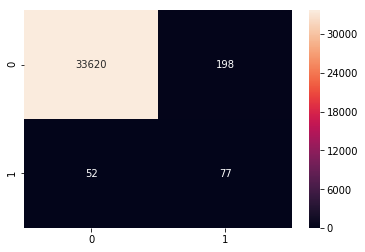

mes: 5


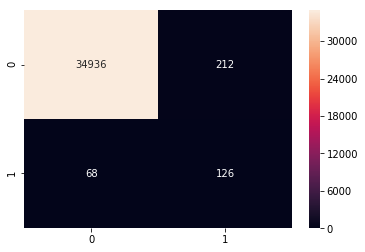

mes: 6


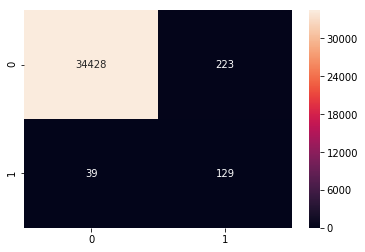

mes: 7


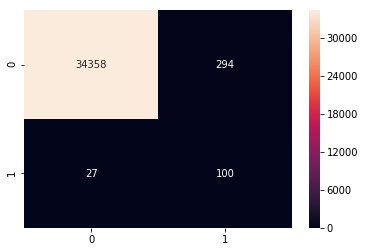

In [176]:
for m in range(4, 8):
    tmp = df_pred[df_pred["mes"] == m]
    print(f"mes: {m}")
    confusion_matrix_plot(tmp["EXISTE_FRAUDE"], tmp["pred"] > 0.5)

Tronador mes: 4


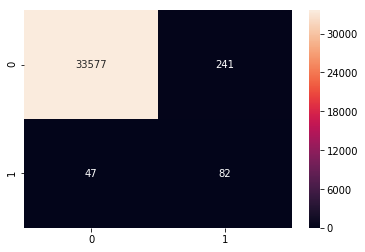

Tronador mes: 5


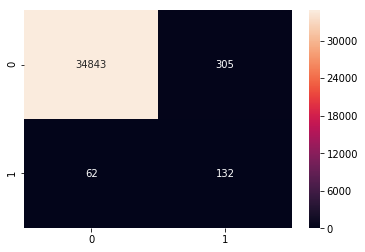

Tronador mes: 6


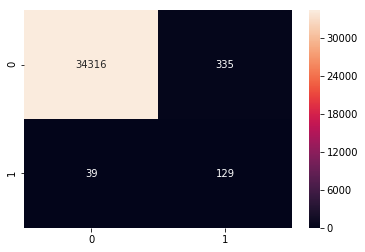

Tronador mes: 7


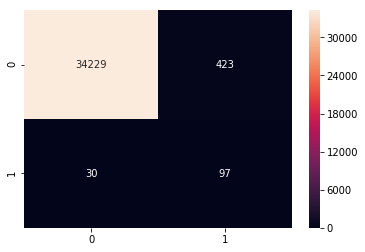

In [177]:
for m in range(4, 8):
    tmp = df_pred[df_pred["mes"] == m]
    print(f"Tronador mes: {m}")
    confusion_matrix_plot(tmp["EXISTE_FRAUDE"], tmp["es_gte_5"])

mes: 4


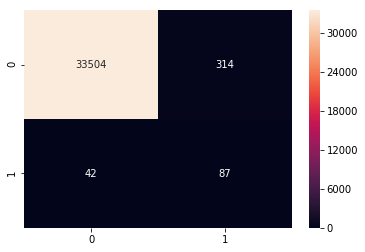

mes: 5


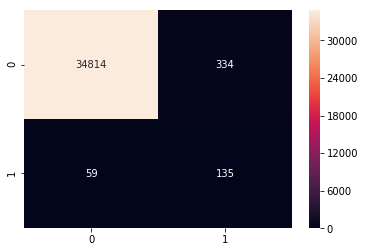

mes: 6


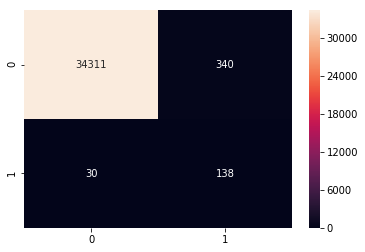

mes: 7


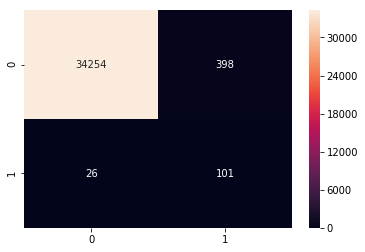

In [178]:
for m in range(4, 8):
    tmp = df_pred[df_pred["mes"] == m]
    print(f"mes: {m}")
    confusion_matrix_plot(tmp["EXISTE_FRAUDE"], tmp["pred"] > 0.45)

In [179]:
df_pred["mes"].value_counts(dropna=False)

NaN    61463
5.0    35342
6.0    34819
7.0    34779
4.0    33947
8.0    28304
Name: mes, dtype: int64

mes: 7


ValueError: zero-size array to reduction operation minimum which has no identity